# **SMA EXPERIMENT NO - 5**

### **Yash Ashok Shirsath BE AI & DS - 40 / B2**

In [2]:
! pip install praw textblob wordcloud emoji vaderSentiment seaborn matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.8 MB/s eta 0:00:00


In [5]:
import praw
import re
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

reddit = praw.Reddit(
client_id="JsmvtICXZGE0q4yMnb4i2w",
client_secret="9JY0sQul5OBUM2klZTMr9hAI1X3_9g",
user_agent="myRedditScraper/1.0 by yash"
)

In [6]:
subreddit_name = "AmazonReviews"
comments = []
emoticons = []

for submission in reddit.subreddit(subreddit_name).hot(limit=10):
    for comment in submission.comments:
        if hasattr(comment, "body"):
            comments.append(comment.body)
            found_emojis = emoji.emoji_list(comment.body)
            if found_emojis:
                emoticons.extend([e["emoji"] for e in found_emojis])

print(f"Total Comments: {len(comments)}")
print(f"Total Emoticons: {len(emoticons)}")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Total Comments: 18
Total Emoticons: 5


In [8]:
df_comments = pd.DataFrame({'Comment': comments})
df_emoticons = pd.DataFrame({'Emoticon': emoticons})

df_comments.to_csv("reddit_comments.csv", index=False)
df_emoticons.to_csv("reddit_emoticons.csv", index=False)

analyzer = SentimentIntensityAnalyzer()
text_sentiments = [analyzer.polarity_scores(comment)["compound"] for comment in comments]
word_counts = [len(comment.split()) for comment in comments]

df_comments['Sentiment'] = text_sentiments
df_comments['Word_Count'] = word_counts

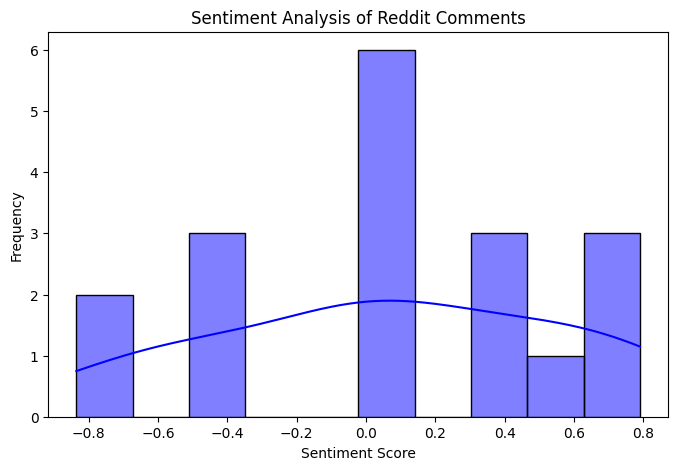

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df_comments['Sentiment'], bins=10, kde=True, color="blue")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis of Reddit Comments")
plt.show()

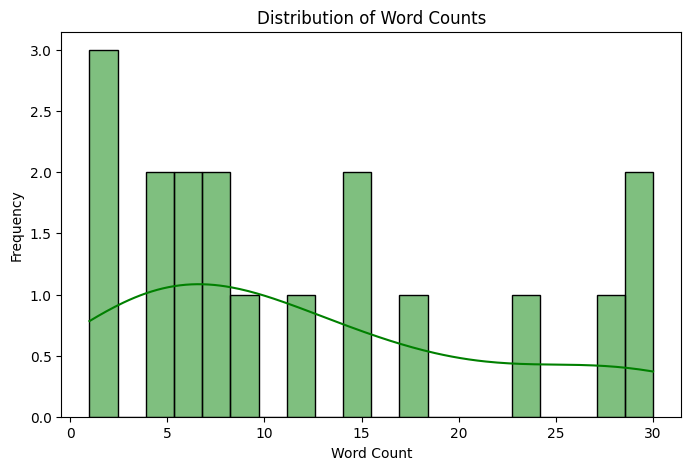

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df_comments['Word_Count'], bins=20, kde=True, color="green")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts")
plt.show()

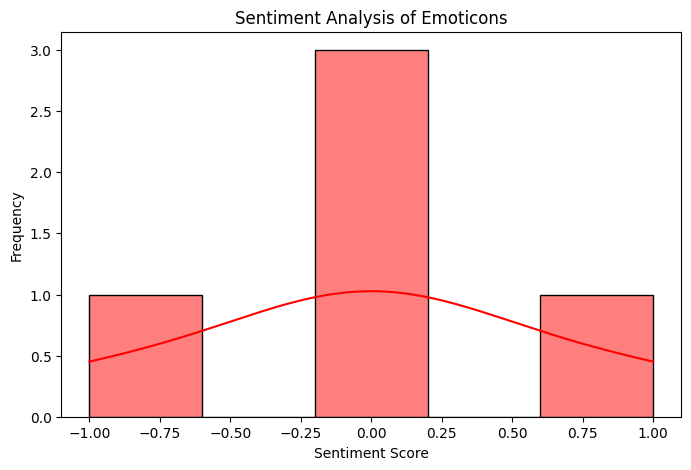

In [11]:
emoticon_sentiment = {
    "😀": 1, "😃": 1, "😄": 1, "😁": 1, "😂": 1, "😊": 1, "😇": 1,
    "😐": 0, "😑": 0, "😶": 0,
    "😢": -1, "😭": -1, "😡": -1, "😠": -1, "😞": -1, "😔": -1,
}

emoticon_scores = [emoticon_sentiment.get(e, 0) for e in emoticons]
df_emoticons['Sentiment'] = emoticon_scores

plt.figure(figsize=(8, 5))
sns.histplot(df_emoticons['Sentiment'], bins=5, kde=True, color="red")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis of Emoticons")
plt.show()
